In [3]:
import gower
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [4]:
# load the daataset and remove the last two columns
dataset = pd.read_csv('dataset.csv', sep = ";", decimal=",")
dataset = dataset.iloc[:, 1:-2]

In [43]:
dataset

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875
7196,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469
7197,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250
7198,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688


In [5]:
dataset.describe()

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.531790,0.695694,0.869444,0.984583,0.987222,0.961667,0.989167,0.985972,0.983194,0.934444,...,0.987361,0.991806,0.974444,0.999861,0.951111,0.009172,0.108506,0.179649,0.374250,0.173773
std,0.197156,0.460145,0.336937,0.123212,0.112322,0.192013,0.103525,0.117613,0.128551,0.247521,...,0.111718,0.090158,0.157816,0.011785,0.215651,0.043357,0.042001,0.060148,0.088354,0.056402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.001340,0.091922,0.145485,0.324074,0.145312
50%,0.562500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.003208,0.109192,0.175585,0.370370,0.170313
75%,0.687500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.005094,0.119777,0.205686,0.402778,0.195313
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: xlabel='Dim_0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_1=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_2=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_3=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_4=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_5=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_6=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_7=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_8=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_9=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_10=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_11=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_12=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_13=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_14=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_15=0', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_16', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_17', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_18', ylabel='Dim_0'>,
        <Axes: xlabel='Dim_19', ylabel='Dim_0'>,


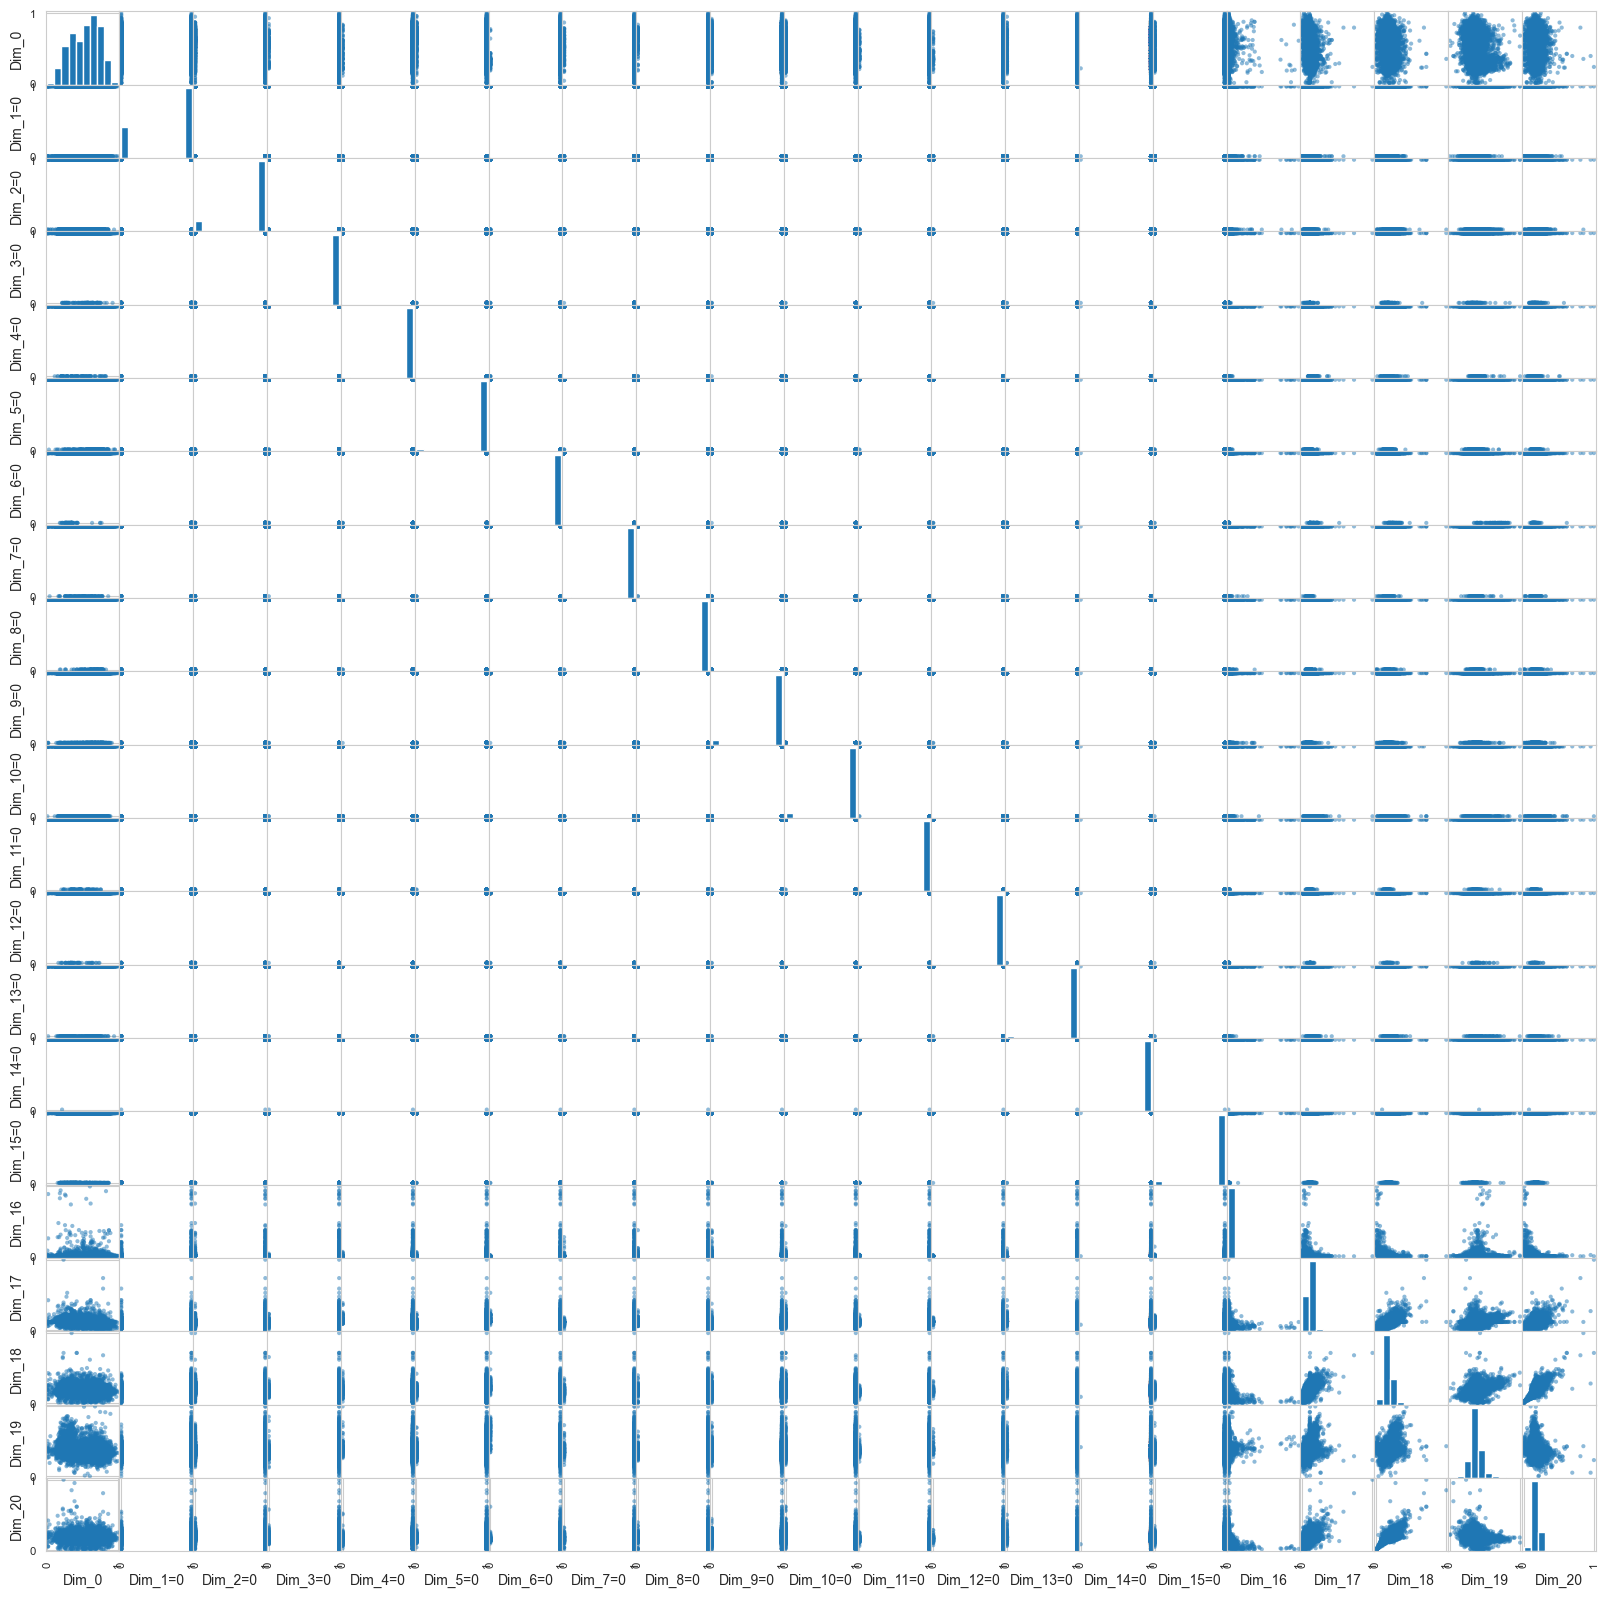

In [6]:
pd.plotting.scatter_matrix(dataset, figsize = (20,20))

In [4]:
[N,M] = np.shape(dataset)  
PAL = ['green', 'blue', 'yellow', 'orange', 'purple', 'magenta', 'cyan', 'brown', 'black', 'red']

In [5]:
def PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL):
  '''
  INPUT
  data2visualize    - data matrix to visualize
  NCOMP             - no. of components to decompose the dataset during PCA
  LABELS            - labels given by the clustering solution
  PAL               - palette of colours to distinguish between clusters
  '''
  '''
  OUTPUT
  Two figures: one using PCA and one using tSNE
  '''
  # PCA
  pca = PCA(n_components=NCOMP)
  pca_result = pca.fit_transform(data2visualize)
  print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

  # tSNE
  print('\nApplying tSNE...')
  np.random.seed(100)
  tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300)
  tsne_results = tsne.fit_transform(data2visualize)

  # Plots
  fig1000 = plt.figure(figsize=(10,5))
  fig1000.suptitle('Dimensionality reduction of the dataset', fontsize=16)

  # Plot 1: 2D image of the entire dataset
  ax1 = fig1000.add_subplot(121)
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
  ax1.set_xlabel('Dimension 1', fontsize=10)
  ax1.set_ylabel('Dimension 2', fontsize=10)
  ax1.title.set_text('PCA')
  plt.grid()

  ax2= fig1000.add_subplot(122)
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)
  ax2.set_xlabel('Dimension 1', fontsize=10)
  ax2.set_ylabel('Dimension 2', fontsize=10)
  ax2.title.set_text('tSNE')
  plt.grid()
  plt.show()

PCA: explained variation per principal component: [0.31 0.16]

Applying tSNE...


/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_33724/3709437359.py:30: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_33724/3709437359.py:37: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


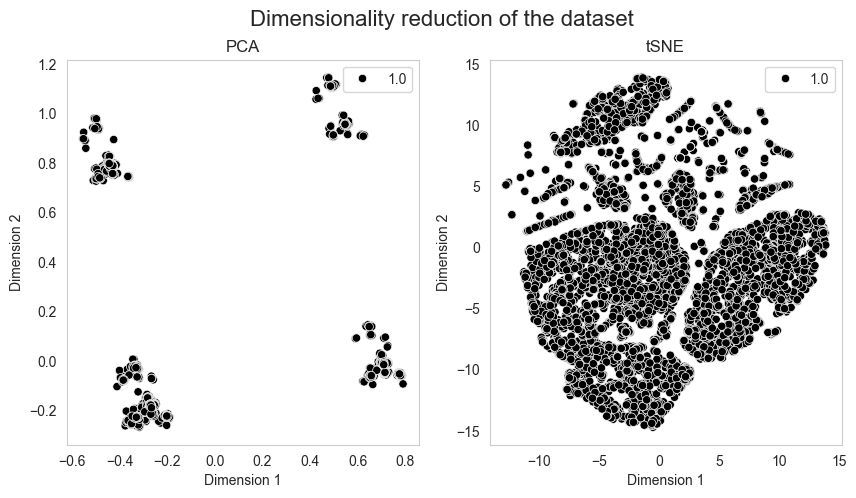

In [9]:
PCA_tSNE_visualization(dataset.to_numpy(), 2, np.ones(N), PAL)

# Local Outlier Factor

In [68]:
clf = LocalOutlierFactor(n_neighbors=20, metric=METRIC)
outliers_factor = clf.fit_predict(dataset)

In [69]:
flaggedDataset = dataset.copy()
flaggedDataset['outliers'] = outliers_factor

PCA: explained variation per principal component: [0.31 0.16]

Applying tSNE...


/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_33724/3709437359.py:30: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_33724/3709437359.py:37: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


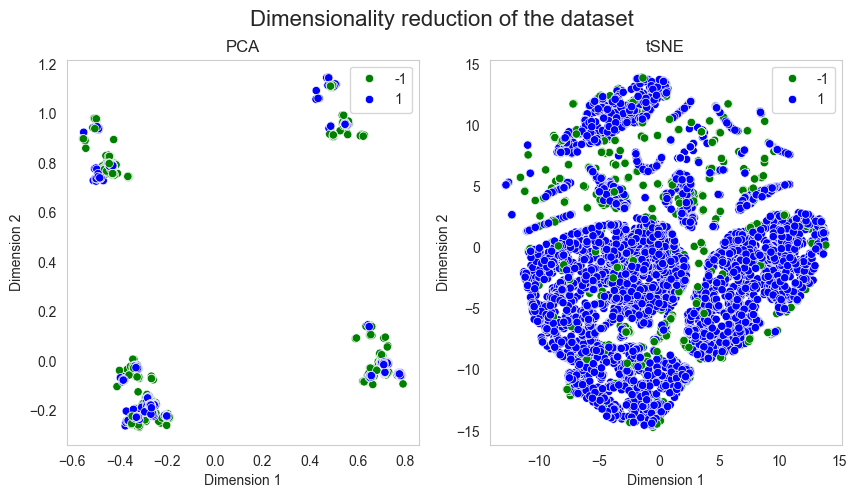

In [70]:
PCA_tSNE_visualization(dataset.to_numpy(), 2, outliers_factor, PAL)

/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_33724/3524724687.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=dataset.iloc[:,16], y=dataset.iloc[:,17], hue=outliers_factor, palette=PAL)


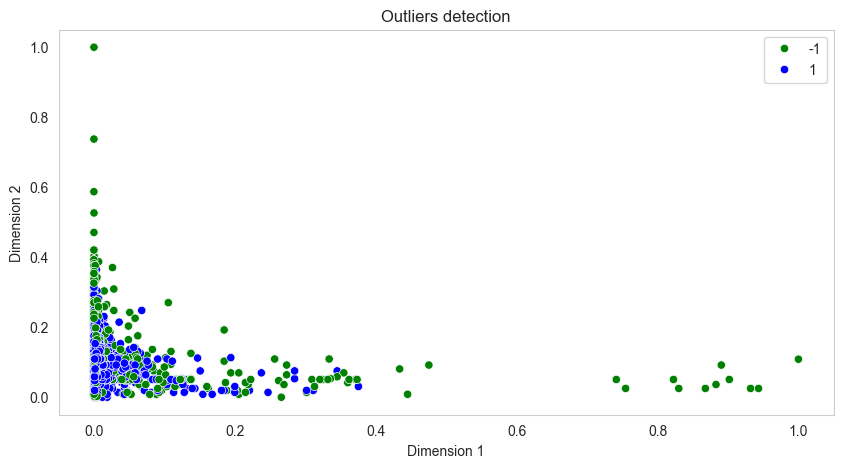

In [76]:
# make a scatterplot with the outliers
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(x=dataset.iloc[:,16], y=dataset.iloc[:,17], hue=outliers_factor, palette=PAL)
plt.xlabel('Dimension 1', fontsize=10)
plt.ylabel('Dimension 2', fontsize=10)
plt.title('Outliers detection')
plt.grid()
plt.show()

# DBSCAN with Gower distance

In [131]:
np.random.seed(42)
dist_matrix = gower.gower_matrix(dataset)
db = DBSCAN(eps = 0.04, min_samples = 2, metric = "precomputed").fit(dist_matrix)
labels = db.labels_

print(pd.DataFrame(labels).value_counts())
print("We found", len(np.where(labels == -1)[0]), "outliers")

0 
1     2901
2     1490
3      553
6      263
8      224
      ... 
20       2
59       2
58       2
55       2
89       2
Name: count, Length: 91, dtype: int64
We found 51 outliers


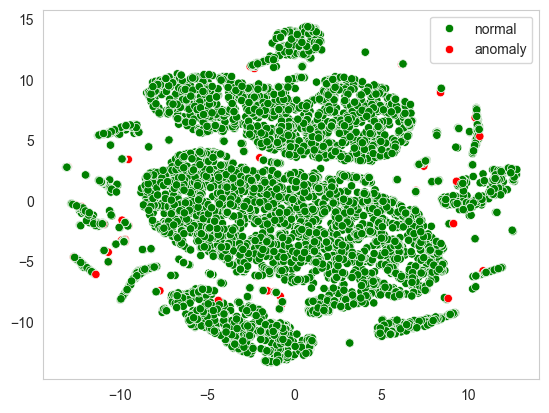

In [132]:
# set a seed
np.random.seed(42)
tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300, metric="precomputed", init='random')
tsne_results = tsne.fit_transform(dist_matrix)

colors = ['anomaly' if label == -1 else 'normal' for label in labels]
localPalette = ['green', 'red']

sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=colors, palette=localPalette)
plt.grid()
plt.show()

In [40]:
# compute the siloutte score for the DBSCAN clustering
print(silhouette_score(dist_matrix, labels, metric = 'precomputed'))

0.6192173


In [133]:
from sklearn.svm import OneClassSVM

# mi sono fidata ciecamente di cosa hai fatto al dataset 
dataset = pd.read_csv('dataset.csv', sep = ";", decimal=",")
dataset = dataset.iloc[:, 1:-2]

# One-Class SVM
svm = OneClassSVM(nu=0.007) # is nu is the portion of anomalies 
outliers = svm.fit_predict(dataset)

flaggedDataset = dataset.copy()
flaggedDataset['outliers'] = outliers # mi sono fidata ciecamente anche qua di te
# dist_matrix = gower.gower_matrix(dataset)
# tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300, metric="precomputed", init='random')
# tsne_results = tsne.fit_transform(dist_matrix)
# sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=outliers, palette=PAL)
# plt.grid()
# plt.show()

numero_outliers = (flaggedDataset['outliers'] == -1).sum() # unica idea che ho avuto
numero_non_outliers = (flaggedDataset['outliers'] == 1).sum()

print("Numero di outliers:", numero_outliers)
print("Numero di non outliers:", numero_non_outliers)

Numero di outliers: 50
Numero di non outliers: 7150


In [134]:
# convert flaggedDataset['outliers'] to an array
outliers = flaggedDataset['outliers'].to_numpy()

In [135]:
# print the index where "outliers" are -1
np.where(outliers == -1)

(array([ 202,  704,  879,  974, 1045, 1077, 1367, 1442, 1626, 2262, 2269,
        2322, 2327, 2344, 2750, 3180, 3378, 3400, 3404, 3598, 3600, 3669,
        3675, 3960, 3983, 3987, 4077, 4106, 4586, 4603, 4655, 4932, 5231,
        5416, 5436, 5462, 5506, 5639, 6005, 6092, 6112, 6273, 6629, 6680,
        6766, 6818, 6918, 6941, 7016, 7116]),)

In [136]:
#704 print the index where "labels" are -1
np.where(labels == -1)

(array([ 704,  879,  974, 1026, 1077, 1171, 1442, 1626, 2262, 2269, 2322,
        2327, 2750, 2879, 2915, 3365, 3378, 3397, 3484, 3600, 3669, 3960,
        3987, 4039, 4054, 4077, 4233, 4350, 4522, 4655, 4752, 4932, 4952,
        4985, 4986, 5416, 5436, 5462, 5506, 5639, 5885, 6005, 6671, 6680,
        6766, 6818, 6854, 6918, 6941, 7016, 7116]),)

In [137]:
# adjusted_rand_score
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(outliers, labels)

0.007607018117166874

In [138]:
svmOutliers = np.where(outliers == -1)
dbscanOutliers = np.where(labels == -1)

In [139]:
# convert 'svmOutliers' and 'dbscanOutliers' to a normal array
svmOutliers = svmOutliers[0]
dbscanOutliers = dbscanOutliers[0]

In [140]:
len(dbscanOutliers)

51

In [141]:
counter = 0
for i in range(len(svmOutliers)):
  for j in range(len(dbscanOutliers)):
    if(svmOutliers[i] == dbscanOutliers[j]):
      counter += 1
print("Found ", counter, "common outliers between SVM and DBSCAN")

Found  32 common outliers between SVM and DBSCAN


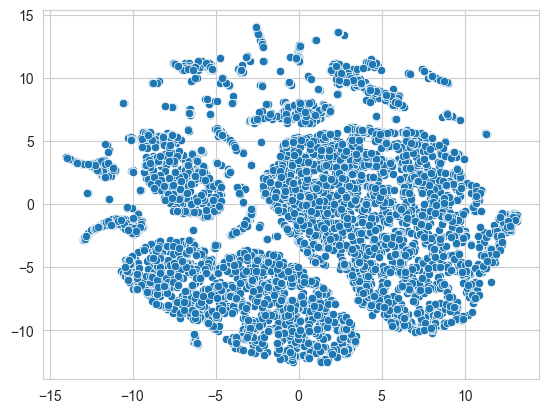

In [5]:
dist_matrix = gower.gower_matrix(dataset)
tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300, metric="precomputed", init='random')
tsne_results = tsne.fit_transform(dist_matrix)

# get the uniques labels
# unique_labels = list(set(labels))
# colors = []m,
# for label in labels:
#     colors.append(PAL[unique_labels.index(label)])
# hue=labels, palette=PAL
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.show()

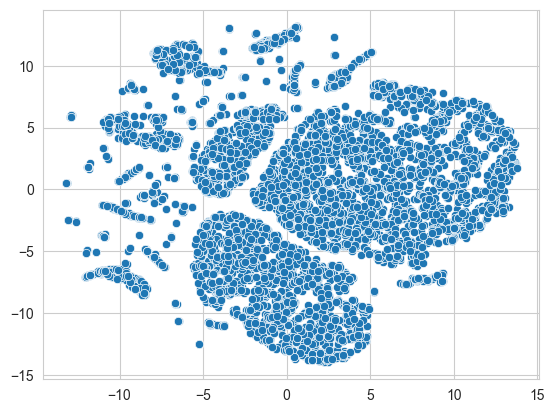

In [2]:
dataset = pd.read_csv('dataset.csv', sep = ";", decimal=",")
dataset = dataset.iloc[:, 1:-2]
dist_matrix = gower.gower_matrix(dataset)
tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300, metric="precomputed", init='random')
tsne_results = tsne.fit_transform(dist_matrix)

# get the uniques labels
# unique_labels = list(set(labels))
# colors = []m,
# for label in labels:
#     colors.append(PAL[unique_labels.index(label)])
# hue=labels, palette=PAL
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1])
plt.show()

In [5]:
# Calculate the covariance for continuos variables
covariance = dataset.cov()

In [8]:
covariance

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
Dim_0,0.038870,0.000414,-0.000426,0.000127,0.001118,-0.002983,0.002179,0.000459,-0.001548,-0.002200,...,0.000803,0.000991,0.001569,0.000045,0.004040,-0.000189,-0.001730,-0.000715,-0.002811,0.000332
Dim_1=0,0.000414,0.211733,-0.015842,0.002948,-0.001527,0.000696,-0.003297,-0.002047,-0.000947,-0.007728,...,0.001710,-0.000133,-0.005277,0.000097,0.010819,0.000869,0.000871,0.004181,0.008981,0.000699
Dim_2=0,-0.000426,-0.015842,0.113527,-0.000207,-0.000140,-0.003200,-0.000025,0.000808,0.003223,0.009359,...,-0.000261,0.000041,-0.000975,-0.000018,-0.004717,-0.000195,0.000135,-0.004061,-0.001089,-0.003365
Dim_3=0,0.000127,0.002948,-0.000207,0.015181,-0.000197,-0.000035,0.000389,-0.000077,-0.000259,-0.000594,...,-0.000195,0.000013,-0.000116,0.000137,-0.000754,0.000079,0.000050,0.000081,0.000268,-0.000048
Dim_4=0,0.001118,-0.001527,-0.000140,-0.000197,0.012616,-0.000490,0.000417,-0.000179,0.000202,-0.000699,...,-0.000162,-0.000105,-0.000327,-0.000002,-0.000625,0.000053,-0.000460,-0.000120,-0.000488,0.000068
Dim_5=0,-0.002983,0.000696,-0.003200,-0.000035,-0.000490,0.036869,-0.000415,-0.000121,-0.000644,0.000682,...,-0.000207,-0.000314,-0.000146,-0.000005,-0.001319,0.000169,0.000480,0.000366,0.000356,0.000274
Dim_6=0,0.002179,-0.003297,-0.000025,0.000389,0.000417,-0.000415,0.010717,-0.000152,-0.000182,-0.000571,...,-0.000137,0.000328,0.001668,-0.000002,-0.000252,0.000079,-0.000564,-0.000797,-0.002536,0.000138
Dim_7=0,0.000459,-0.002047,0.000808,-0.000077,-0.000179,-0.000121,-0.000152,0.013833,0.000042,-0.000086,...,-0.000177,-0.000115,0.000058,-0.000002,-0.000686,-0.000088,0.000078,0.000147,-0.000132,0.000141
Dim_8=0,-0.001548,-0.000947,0.003223,-0.000259,0.000202,-0.000644,-0.000182,0.000042,0.016525,0.001676,...,-0.000212,-0.000138,-0.000430,-0.000002,-0.000822,-0.000071,-0.000033,0.000090,-0.000196,0.000126
Dim_9=0,-0.002200,-0.007728,0.009359,-0.000594,-0.000699,0.000682,-0.000571,-0.000086,0.001676,0.061267,...,-0.000273,-0.000259,-0.001259,-0.000009,-0.001677,-0.000463,0.000573,0.000264,-0.000186,0.000324


In [15]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=11, covariance_type='full', random_state=0)
gmm = gmm.fit_predict(dataset)

In [21]:
PAL = ['green', 'blue', 'yellow', 'orange', 'purple', 'magenta', 'cyan', 'brown', 'black', 'red']

In [22]:
def TSNEPlot(dataset, labels):
    dist_matrix = gower.gower_matrix(dataset)
    tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300, metric="precomputed", init='random')
    tsne_results = tsne.fit_transform(dist_matrix)

    # get the uniques labels
    # unique_labels = list(set(labels))
    # colors = []m,
    # for label in labels:
    #     colors.append(PAL[unique_labels.index(label)])
    # hue=labels, palette=PAL
    sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette=PAL)
    plt.show()

/var/folders/5d/lh100_9d5d7bwtxzmg0zcdmh0000gn/T/ipykernel_25502/590002042.py:12: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels, palette=PAL)


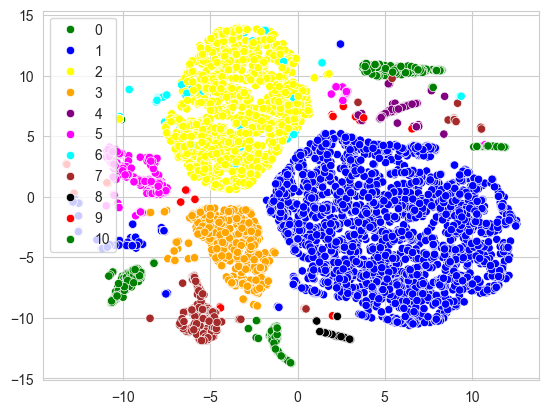

In [23]:
TSNEPlot(dataset, gmm)

In [29]:
gmm = GaussianMixture(n_components=11, covariance_type='full', random_state=0)
gmm.fit_predict(dataset)

array([ 9,  1,  1, ..., 10,  2, 10])

In [72]:
# given the dataset and the distribution given from the GMM calculate the uoutliers using a robust distance
def getOutliers(dataset, gmm):
    # get the means and the covariances
    means = gmm.means_
    covariances = gmm.covariances_
    # get the number of samples
    N = len(dataset)
    # get the number of components
    K = len(means)
    # get the number of features
    M = len(dataset.columns)
    # get the weights
    weights = gmm.weights_
    # get the mahalanobis distance
    gower_distance = np.zeros((N, K))
    for i in range(K):
        cov = covariances[i]
        mean = means[i]
        for j in range(N):
            #calculate the gower distance for each sample
            gower_distance[j, i] = np.sqrt(np.dot(np.dot((dataset.iloc[j] - mean).T, np.linalg.inv(cov)), (dataset.iloc[j] - mean)))
    
    # get the minimum mahalanobis distance
    minMahalanobis = np.min(gower_distance, axis=1)
    # get the threshold
    threshold = np.percentile(minMahalanobis, 97)
    # get the outliers
    outliers = np.where(minMahalanobis > threshold)
    return outliers

In [73]:
outliers = getOutliers(dataset, gmm)

In [74]:
len(outliers[0])

216